# Online Retail sales Analysis
#### by Nadeem Irfan




#### Table of Contents
-	1. Introduction
-	2. Data Wrangling
-	3. Exploratory Data Analysis
-	4. Model Selection and Evaluation
-	5. Conclusions
-	6. References

## 1. Introduction
In this project, we will analyze OnlineRetail sales data across different customers to understand the various customer purchase patterns for their firm. We will use this data to find useful insights about the customer purchasing history
that can be an added advantage for the online retailer. we will also segment the customers based on their purchasing behavior.


### 1.1 Dataset description
The file OnlineRetail.csv consists of different customer sales from 2010-12-01 to 2011-12-09. The file has the following columns:

- IncoiceNo. : Invoice-number is a nominal, 6-digit, integral number uniquely assigned to each transaction. If this code starts with ‘c’, it indicates a cancellation.
-	StockCode : Product (Item) code is Nominal data, a 5-digit integral number uniquely assigned to each distinct product.
-	Description: Product (Item) name, (Nominal data).
-	Quantity: The quantities if each product (item) per transaction. Nominal.
-	InvoiceDate: Invoice Date and time (Numeric) describes the day and time when each transaction was generated.
-	UnitPrice: Unit Price (Numeric) describes the product price per unit.
-	CustomerID: Customer number (Nominal), is 5-digit integral number uniquely assigned to each customer.
-	Country: Country name (Nominal), is the name of the country where each customer resides.
 

### 1.2 Importing dependencies
The following packages are essential to running this project successfully: numpy, pandas, matplotlib, seaborn, and sklearn.

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt

#Plotly library
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Libraries realted to KMeans clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings 
warnings.filterwarnings('ignore')

### 1.3 Loading the dataset

In [97]:
#loading the online-retail-sales data
sales = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')

In [98]:
# load the dataset
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2. Data Wrangling
In this section, we will identify and address any errors, inconsistencies, missing values in the dataset. This will ensure that the dataset is accurate, consistent, and complete, and will make it more suitable for analysis.

In [99]:
# get the concise summary of the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


We can see that the dataset contains 541909 rows and 8 columns. All of the columns are in the appropriate data types, with the exception of the 'InvoiceDate' column, which needs to be converted to a datetime type. In addition, the feature names will be converted to lowercase for consistency. This information helps us understand the structure and content of the dataset, and identify any necessary data type conversions or formatting changes.

##### Convert Date column data type to date-time

In [100]:
# convert Date column data type to date-time
sales['InvoiceDate']=pd.to_datetime(sales['InvoiceDate'])

In [101]:
# check
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The Date has been converted to date-time data type.

#### Are there any missing/null values in the dataset?

##### Check missing values

In [102]:
#checking the missing/ null values
sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can see that there are 135080 null values in CusomerID, and 1454 in Description

In [103]:
# removing null values
sales.dropna(inplace=True)

In [104]:
#Check the null values arfter removing them
sales.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### checking inconsistancy in data.

#### checking the quantity term if its negative

In [105]:
sales.loc[sales['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


We can see that the Quantity is value is negative for InvoiceNo sarts with C, this is a cancelled transaction, which needs to be removed

#### Dropping the transactions which are not meaningful.

In [106]:
# removing the negative Quantity values
sales = sales.loc[sales['Quantity']>0]

In [107]:
#checking after dropping negative Quantity values
sales.loc[sales['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We have removed the inconsistancy rentires in the dataset

In [108]:
#Checking the cancelled transactions (ie) 
sales.loc[sales['InvoiceNo'].str.startswith('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We can see that there are no such entries with Cancelled Transactions

## 3. Feature Engineering
We have derive the following, from the given data
1. Extract year, month, day, hours from InvocieDate
2. We can furhter derive day as morning, afternoon, evening
3. We can derive TotalAmount by multiplying Quantity and UnitPrice
We can see the sales Year wise, month wise, day-wise and Part-of-the-day-wise. TotalAmount can be used as sales instead of Quantity and UnitPrice (because a customer mght purchace expensive prduct, UnitPrice is high but Quantity is less or vice-versa)

In [109]:
# extracting year, month, day and hour from InvoiceDate
sales['year'] = sales['InvoiceDate'].dt.year
sales['month'] = sales['InvoiceDate'].dt.month_name()
sales['day'] = sales['InvoiceDate'].dt.dayofweek.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
sales['hour'] = sales['InvoiceDate'].dt.hour

In [110]:
#Derving Parts of the day 'Morning' 'Afternoon', 'Evening'
def time(time):
    if time>=6 and time<=12:
        return 'Morning'
    elif time>=12 and time<=18:
        return 'Afternoon'
    else:
        return 'Evening'
    
sales['Date_time_type'] = sales['hour'].apply(time)

In [111]:
sales['TotalAmount'] = sales['Quantity'] * sales['UnitPrice']

In [112]:
sales.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,Date_time_type,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,Morning,22.00


In [113]:
#validate info the feature-engineering done so far
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397924 non-null  object        
 1   StockCode       397924 non-null  object        
 2   Description     397924 non-null  object        
 3   Quantity        397924 non-null  int64         
 4   InvoiceDate     397924 non-null  datetime64[ns]
 5   UnitPrice       397924 non-null  float64       
 6   CustomerID      397924 non-null  float64       
 7   Country         397924 non-null  object        
 8   year            397924 non-null  int64         
 9   month           397924 non-null  object        
 10  day             397924 non-null  object        
 11  hour            397924 non-null  int64         
 12  Date_time_type  397924 non-null  object        
 13  TotalAmount     397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), in

We can see that we have year, month, day, hour, Date_time_type and TotalAmount as purchase of customer, as additional features

## 4. Exploratory data analysis
Here we exlore the given sales data, for customer in-order to see the TotalAmount (target_value) or count of transactions for different features
1) Top 10 products which are in sale (take a count of a given product)
2) Top 10 customers who are frequent
3) Top 5 countries which has highest Sales
4) Top 5 countries which has Least Sales
5) Top 5 customers who spend the most
6) Frequency of sales on different days
7) Sales on different Months
8) TotalAmount per month (and Year wise)
9) Why the december-2011 sales is less than nov-2011 sales
10) Sales on different part of the day

### 4.1 Top 10 products which are in sale (take a count of a given product)

In [114]:
# Getting the top 10 products which are sold
product_count = sales.groupby('Description')['Description'].count().sort_values(ascending=False).head(10)
product_count

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

Text(0.5, 1.0, 'Top 10 products sold')

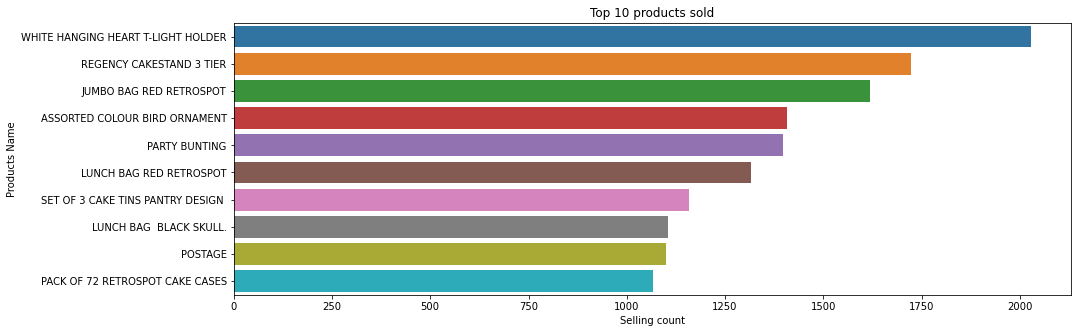

In [115]:
# Plottig the top 10 product sold
x_axis_data = product_count.values
y_axis_data = product_count.index
plt.figure(figsize=(15,5))
sns.barplot(x=x_axis_data, y=y_axis_data, orient='h');
plt.xlabel('Selling count')
plt.ylabel('Products Name')
plt.title('Top 10 products sold')

Here we see that, 'WHITE HANGING HEART T-LIGHT HOLDER' has the highest purchase, which is purchased 2028 times and the second highest product sold is 'REGENCY CAKESTAND 3 TIER', which is sold 1724 times

### 4.2 Top 10 customers who are frequent

In [116]:
# Getting the top 10 customers which are frequent
customer_count = sales.groupby('CustomerID')['CustomerID'].count().sort_values(ascending=False).head(10)
customer_count

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
14646.0    2080
13089.0    1818
13263.0    1677
14298.0    1637
Name: CustomerID, dtype: int64

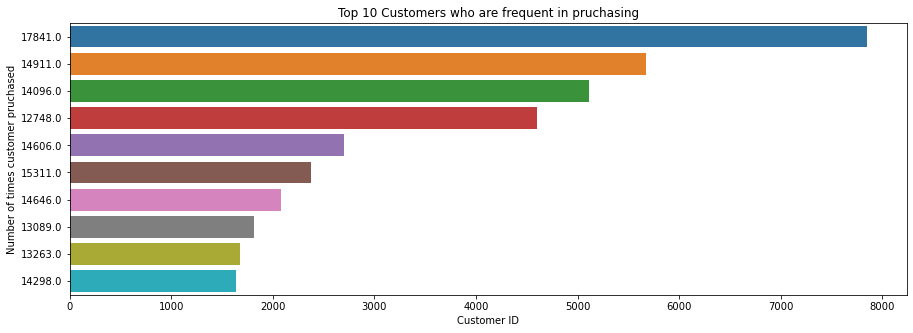

In [117]:
# Plottig the top 10 customers who are frequent
x_axis_data = customer_count.values
y_axis_data = customer_count.index.map(str)
plt.figure(figsize=(15,5))
sns.barplot(x=x_axis_data, y=y_axis_data, orient='h');
plt.xlabel('Customer ID')
plt.ylabel('Number of times customer pruchased')
plt.title('Top 10 Customers who are frequent in pruchasing');

Customer '17841.0' is te most frequent purchaser with frequency of 7847

### 4.3 Top 5 countires which has highest Sales

In [118]:
# Getting the top 5 countires which has highest number of customers
country_count = sales.groupby('Country')['Quantity'].count().sort_values(ascending=False).head(5)
country_count

Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Quantity, dtype: int64

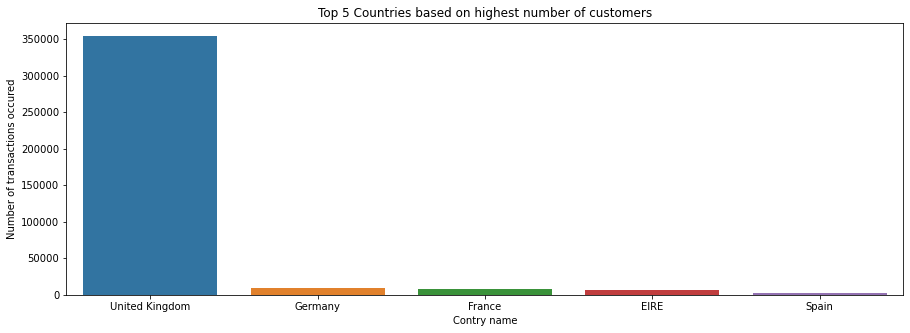

In [119]:
# Plottig the top 5 countires which has highest number of customers
x_axis_data = country_count.index
y_axis_data = country_count.values
plt.figure(figsize=(15,5))
sns.barplot(x=x_axis_data, y=y_axis_data);
plt.xlabel('Contry name')
plt.ylabel('Number of transactions occured')
plt.title('Top 5 Countries based on highest number of customers');

UnitedKingdom has the highest number of tranctions with count as 354345, but the 4 other countres (Germany, France, Ireland, Spain) almost similar sales count. UnitedKingdom has significantly larger amount of sales (as an outlier among oll other countries)

### 4.4 Top 5 countires which has Least Sales

In [120]:
# Getting the top 5 countires which has least number of customers
country_count = sales.groupby('Country')['Quantity'].count().sort_values(ascending=False).tail(5)
country_count

Country
Lithuania         35
Brazil            32
Czech Republic    25
Bahrain           17
Saudi Arabia       9
Name: Quantity, dtype: int64

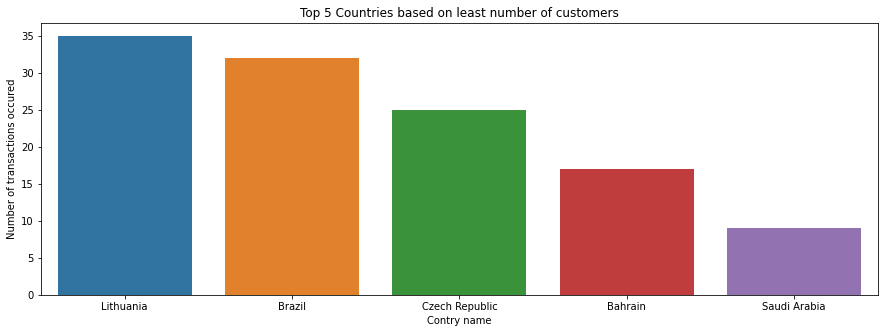

In [121]:
# Plottig the top 5 countires which has least number of customers
x_axis_data = country_count.index
y_axis_data = country_count.values
plt.figure(figsize=(15,5))
sns.barplot(x=x_axis_data, y=y_axis_data);
plt.xlabel('Contry name')
plt.ylabel('Number of transactions occured')
plt.title('Top 5 Countries based on least number of customers');

'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia' are the 5 countries with least sales, and the lowest is Saudi Arabia with number of transactions as 9

### 4.5 Top 5 customers who spend the most

In [122]:
# Getting the top 5 customers whose purchase is the highest
avg_customer_purchase = sales.groupby('CustomerID')['TotalAmount'].mean().sort_values(ascending=False).head(5)
avg_customer_purchase

CustomerID
12346.0    77183.60
16446.0    56157.50
15098.0    13305.50
15749.0     4453.43
15195.0     3861.00
Name: TotalAmount, dtype: float64

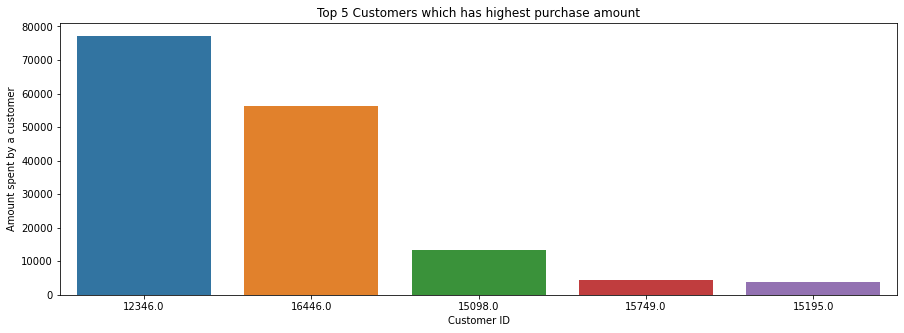

In [123]:
# Plottig the top 5 customers which has highest purchase amount
x_axis_data = avg_customer_purchase.index.map(str)
y_axis_data = avg_customer_purchase.values
plt.figure(figsize=(15,5))
sns.barplot(x=x_axis_data, y=y_axis_data);
plt.xlabel('Customer ID')
plt.ylabel('Amount spent by a customer')
plt.title('Top 5 Customers which has highest purchase amount');

customer '12346.0' has the highest purchase , with an amount of 77183.60, 
However customer '17841.0' is the most frequent purchaser with frequency of 7847

### 4.6 Frequency of sales on different days

In [124]:
# Getting the frequency of sales on different days
frequency_of_transactions_per_day = sales.groupby('day')['day'].count().sort_values(ascending=False)
frequency_of_transactions_per_day

day
Thursday     80052
Wednesday    68888
Tuesday      66476
Monday       64899
Sunday       62775
Friday       54834
Name: day, dtype: int64

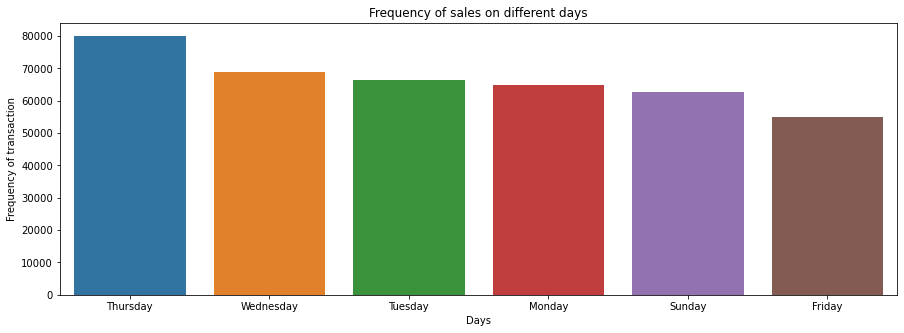

In [125]:
# Plottig the frequency of sales on different days
x_axis_data = frequency_of_transactions_per_day.index
y_axis_data = frequency_of_transactions_per_day.values
plt.figure(figsize=(15,5))
sns.barplot(x=x_axis_data, y=y_axis_data);
plt.xlabel('Days')
plt.ylabel('Frequency of transaction')
plt.title('Frequency of sales on different days');

Thursday has the highest number of purchase-items of 80052 items sale. The other days have similar amount of pruchase around 6000 to 7000 items sale. However there is no sale on Saturday.  

### 4.7 Sales on different Months

In [126]:
# Getting the frequency of sales on different days
frequency_of_transactions_per_month = sales.groupby('month')['month'].count().sort_values(ascending=False)
frequency_of_transactions_per_month

month
November     64545
October      49557
December     43464
September    40030
May          28322
June         27185
March        27177
August       27013
July         26827
April        22644
January      21232
February     19928
Name: month, dtype: int64

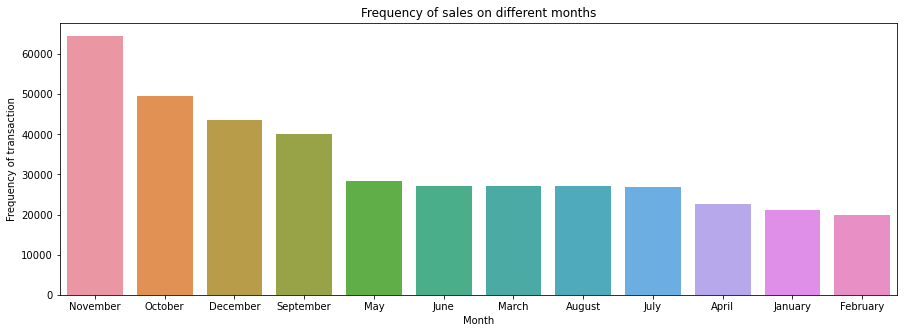

In [127]:
# Plottig the frequency of sales on different month
x_axis_data = frequency_of_transactions_per_month.index
y_axis_data = frequency_of_transactions_per_month.values
plt.figure(figsize=(15,5))
sns.barplot(x=x_axis_data, y=y_axis_data);
plt.xlabel('Month')
plt.ylabel('Frequency of transaction')
plt.title('Frequency of sales on different months');

November has the highest number of sales, then on October, December, September has significantly highe sales than other months

### 4.8 TotalAmount per month (and Year wise)

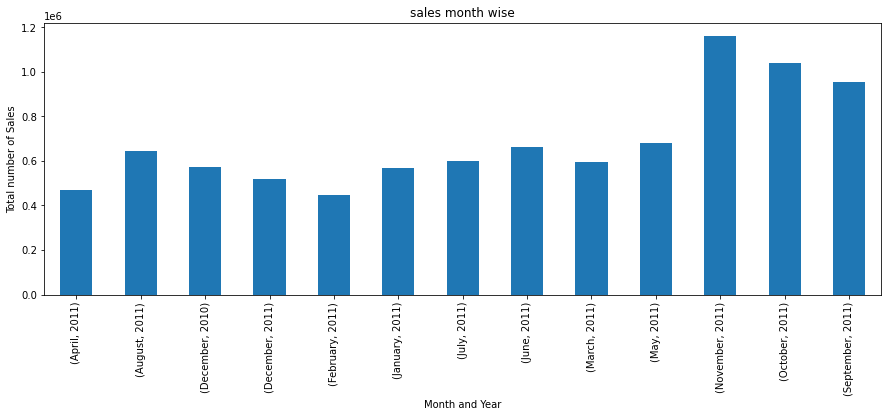

In [128]:
plt.figure(figsize=(15,5))
sales.groupby(['month', 'year'])['TotalAmount'].sum().plot(kind='bar')
plt.xlabel('Month and Year')
plt.ylabel('Total number of Sales')
plt.title('sales month wise');

For 2010 there is only December Sales, and for 2011 entire year sales happened

### 4.9 Why the december-2011 sales is less than nov-2011 sales

In [129]:
get_dec2011=sales.loc[(sales['year']==2011)&(sales['month']=='December')]
get_dec2011['InvoiceDate'].dt.date.unique()

array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

In [130]:
get_nov2011=sales.loc[(sales['year']==2011)&(sales['month']=='November')]
get_nov2011['InvoiceDate'].dt.date.unique()

array([datetime.date(2011, 11, 1), datetime.date(2011, 11, 2),
       datetime.date(2011, 11, 3), datetime.date(2011, 11, 4),
       datetime.date(2011, 11, 6), datetime.date(2011, 11, 7),
       datetime.date(2011, 11, 8), datetime.date(2011, 11, 9),
       datetime.date(2011, 11, 10), datetime.date(2011, 11, 11),
       datetime.date(2011, 11, 13), datetime.date(2011, 11, 14),
       datetime.date(2011, 11, 15), datetime.date(2011, 11, 16),
       datetime.date(2011, 11, 17), datetime.date(2011, 11, 18),
       datetime.date(2011, 11, 20), datetime.date(2011, 11, 21),
       datetime.date(2011, 11, 22), datetime.date(2011, 11, 23),
       datetime.date(2011, 11, 24), datetime.date(2011, 11, 25),
       datetime.date(2011, 11, 27), datetime.date(2011, 11, 28),
       datetime.date(2011, 11, 29), datetime.date(2011, 11, 30)],
      dtype=object)

Inference (Dec-2011 vs Nov-2011): Because Dec-2011 has sales for only 10 days compared to November-2011 

### 4.10 Sales on different part of the day

In [131]:
# Getting the frequency of sales on different days
frequency_of_transactions_in_part_of_the_day = sales.groupby('Date_time_type')['Date_time_type'].count().sort_values(ascending=False)
frequency_of_transactions_in_part_of_the_day

Date_time_type
Afternoon    203624
Morning      190176
Evening        4124
Name: Date_time_type, dtype: int64

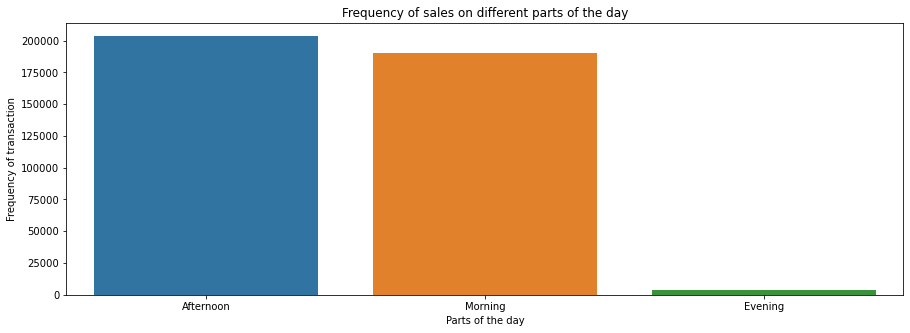

In [132]:
# Plottig the frequency of sales on different Parts of the day
x_axis_data = frequency_of_transactions_in_part_of_the_day.index
y_axis_data = frequency_of_transactions_in_part_of_the_day.values
plt.figure(figsize=(15,5))
sns.barplot(x=x_axis_data, y=y_axis_data);
plt.xlabel('Parts of the day')
plt.ylabel('Frequency of transaction')
plt.title('Frequency of sales on different parts of the day');

There are high amount of sales in monring and afternoon of the day, but very less in evening

### 4.11 Summary of the EDA performed

Following is the sumary for the EDA we performed:

1) Top 10 products which are in sale (take a count of a given product)
-- Here we see that, 'WHITE HANGING HEART T-LIGHT HOLDER' has the highest purchase, which is purchased 2028 times and the second highest product sold is 'REGENCY CAKESTAND 3 TIER', which is sold 1724 times
2) Top 10 customers who are frequent
-- Customer '17841.0' is te most frequent purchaser with frequency of 7847
3) Top 5 countires which has highest Sales
-- UnitedKingdom has the highest number of tranctions with count as 354345, but the 4 other countres (Germany, France, Ireland, Spain) almost similar sales count. UnitedKingdom has significantly larger amount of sales (as an outlier among oll other countries)
4) Top 5 countires which has Least Sales
-- 'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia' are the 5 countries with least sales, and the lowest is Saudi Arabia with number of transactions as 9
5) Top 5 customers who spend the most
-- customer '12346.0' has the highest purchase , with an amount of 77183.60, 
However customer '17841.0' is the most frequent purchaser with frequency of 7847
6) Frequency of sales on different days
-- Thursday has the highest number of purchase-items of 80052 items sale. The other days have similar amount of pruchase around 6000 to 7000 items sale. However there is no sale on Saturday.  
7) Sales on different Months
-- November has the highest number of sales, then on October, December, September has significantly highe sales than other months
8) TotalAmount per month (and Year wise)
-- For 2010 there is only Deceber Sales, and for 2011 entire year sales happened
9) Why the december-2011 sales is less than nov-2011 sales
-- We cound see that in Dec2010 we have sales of 7,48,957 and in Dec2011 we have sales of 4,33,668. On observing further, we saw that in Dec2011 there is sales upto 9th-Dec, where as in Dec-2010 we had from 01-Dec to 23-De
10) Sales on different part of the day
--There are high amount of sales in monring and afternoon of the day, but very less in evening

## 5. Model Building

RFM is a method to analyse customer value. RFM stands for Recency, Frequency, and Monetary.
-	Recency: How recently did the customer visit our website or how recently did a customer purchase.
-	Frequency: How often do they visit or how often do they purchase.
-	Monetary: How much revenue we get from their visit or how much do they spend when they purchase.


### 5.1 Deiving the RFM values for each customer

In [133]:
# Recency = Latest Date of Invoice Date, Frequency = Count of incovice No. of transactions, 
# Monetary = Sum of Total Amount for each cusmtomer

In [134]:
#Get the latest Date in the sales-data
sales['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [135]:
#Set latest date as 2011-12-10 as last Invoice Date is 2011-12-09. This is to calculate the number of dayss from recent purchase
Latest_date= dt.datetime(2011,12,10)

#Create modelling score for each customer
RFMScore = sales.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_date - x.max()).days, 
                                            'InvoiceNo': lambda x: (x.count()),
                                            'TotalAmount': lambda x: (x.sum()) })

#Convert InvoiceDate into type int
RFMScore['InvoiceDate'] = RFMScore['InvoiceDate'].astype(int)

#Rename column names as Recency, Frequency, Monetary
RFMScore.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


### 5.2 Lets see the description and Distribution of the Recency, requency, monetary columns

In [136]:
#Descriptive statistics of Recency column
RFMScore['Recency'].describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

We can see that Recency column has average_value of 92 days, for 4339 number of customes. The maximum recency (ie) last purchase by a customer was on 33 days ago

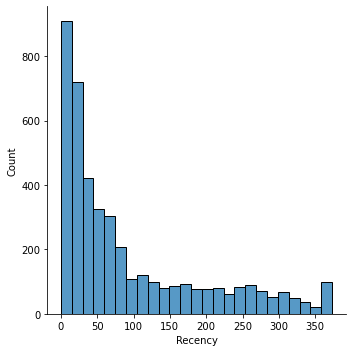

In [137]:
#Recency Distributon plot
sns.displot(x=RFMScore['Recency']);

Distribution of Recency says that, most of the customers have bought he products recently (with Latest_Date as 2011-12-10)

In [138]:
#Descriptive statistics of Frequency column
RFMScore['Frequency'].describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

We can see that Frequency column has average_value of 92 number (approx.) of transactions, for 4339 number of customes. The maximum frequency (ie) highest times of visit by a customer was on 7847 times.

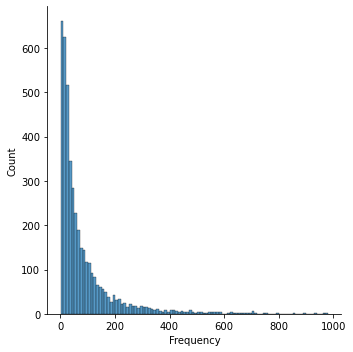

In [139]:
#Frequency Distributon plot
sns.displot(x=RFMScore[(RFMScore['Frequency']<1000)]['Frequency']);

Distribution of Frequency says that, most of the customers have visitied very less. Only few of the customers are regular-customers

In [140]:
#Descriptive statistics of Monetary column
RFMScore['Monetary'].describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

Average amount spent by the customers was 2,053 $ , and the highest purchase value was 2,80,206 $

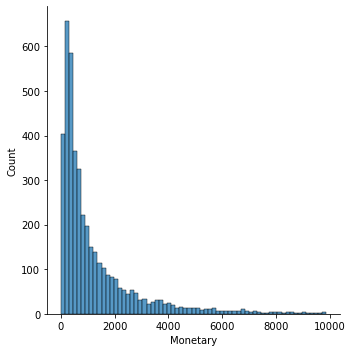

In [141]:
#Monetary Distributon plot
sns.displot(x=RFMScore[(RFMScore['Monetary']<10000)]['Monetary']);

Distribution of Monetary says that, majority of the customer have spent around 2000 $ (we can get the approx. influence from the average monetary value)

### 5.3 Lets split the RFM score into 4 parts and rank the customers accordingly

In [142]:
#Split the RFMScore into four quantile segments
quantiles=RFMScore.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [143]:
#Function to Rank the RFM data as per quantile
def RScoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1


In [144]:
# Add R, F, M segments to the existing dataset
# Least Recency value are ranked one, Higher Frequent customers are ranked one, Higher Purchase (Monetary) of customers are ranked one
RFMScore['R'] = RFMScore['Recency'].apply(RScoring, args=('Recency', quantiles))
RFMScore['F'] = RFMScore['Frequency'].apply(RScoring, args=('Frequency', quantiles))
RFMScore['M'] = RFMScore['Monetary'].apply(RScoring, args=('Monetary', quantiles))
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,1,4
12347.0,2,182,4310.00,1,4,4
12348.0,75,31,1797.24,3,2,4
12349.0,18,73,1757.55,2,3,4
12350.0,310,17,334.40,4,1,2


In [145]:
# Calculate the RFMGroup value column showing the concatenation of R, F, M
RFMScore['RFMGroup'] = RFMScore['R'].map(str) + RFMScore['F'].map(str) + RFMScore['M'].map(str)

# Calculate the RFMScore value column by adding the R,F,M values
RFMScore['RFMScore'] = RFMScore[['R','F','M']].sum(axis=1)
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9
12347.0,2,182,4310.00,1,4,4,144,9
12348.0,75,31,1797.24,3,2,4,324,9
12349.0,18,73,1757.55,2,3,4,234,9
12350.0,310,17,334.40,4,1,2,412,7


In [146]:
#Assign loyalty level to each customer
Loyalty_level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cut = pd.qcut(RFMScore.RFMScore, q=4, labels= Loyalty_level)
RFMScore['RFM_Loyalty_level'] = Score_cut.values
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,12346.0,325,1,77183.60,4,1,4,414,9,Silver
1,12347.0,2,182,4310.00,1,4,4,144,9,Silver
2,12348.0,75,31,1797.24,3,2,4,324,9,Silver
3,12349.0,18,73,1757.55,2,3,4,234,9,Silver
4,12350.0,310,17,334.40,4,1,2,412,7,Gold


Text(0.5, 1.0, 'Categories of customers')

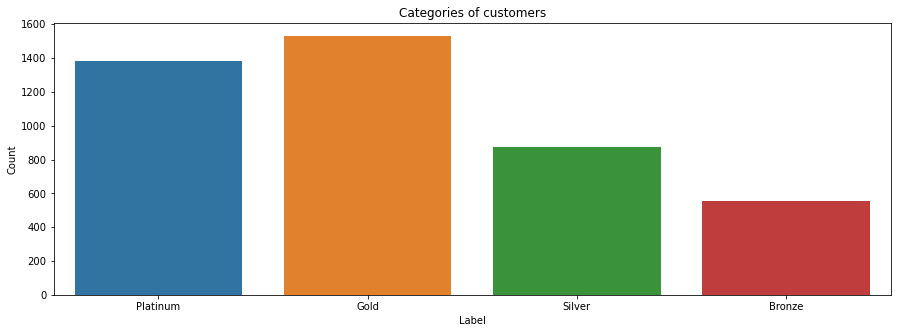

In [147]:
# Plotting the distribution of loyalty of the customers
loyalty_scores = RFMScore.groupby('RFM_Loyalty_level')['RFMScore'].count()
x=loyalty_scores.index.categories
y=loyalty_scores.values
plt.figure(figsize=(15,5))
sns.barplot(x=x,y=y);
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Categories of customers')

In [148]:
RFMScore.groupby('RFM_Loyalty_level')['RFMGroup'].count()

RFM_Loyalty_level
Platinum    1380
Gold        1531
Silver       875
Bronze       553
Name: RFMGroup, dtype: int64

So just using RFM model analysis we created 4 cluster namesly platinum, gold, silver, bronze

## 5.4 Plotting 3 graphs  Recency vs Frequency, Frequency vs Monetary, Recency vs Monetary

In [149]:
graph = RFMScore.query('Monetary<50000 and Frequency<2000')
graph

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
CustomerID,,,,,,,,,
12347.0,2,182,4310.00,1,4,4,144,9,Silver
12348.0,75,31,1797.24,3,2,4,324,9,Silver
12349.0,18,73,1757.55,2,3,4,234,9,Silver
12350.0,310,17,334.40,4,1,2,412,7,Gold
12352.0,36,85,2506.04,2,3,4,234,9,Silver
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,1,1,411,6,Platinum
18281.0,180,7,80.82,4,1,1,411,6,Platinum
18282.0,7,12,178.05,1,1,1,111,3,Platinum


In [150]:
#Recency vs Freqency

In [151]:
plot_data= [
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Bronze'")['Recency'],
    y=graph.query("RFM_Loyalty_level == 'Bronze'")['Frequency'],
    mode='markers',
    name='Bronze',
    marker= dict(size=7,
                line=dict(width=1),
                color='blue',
                opacity=0.8)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Silver'")['Recency'],
    y=graph.query("RFM_Loyalty_level == 'Silver'")['Frequency'],
    mode='markers',
    name='Silver',
    marker= dict(size=9,
                line=dict(width=1),
                color='green',
                opacity=0.5)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Gold'")['Recency'],
    y=graph.query("RFM_Loyalty_level == 'Gold'")['Frequency'],
    mode='markers',
    name='Gold',
    marker= dict(size=11,
                line=dict(width=1),
                color='Red',
                opacity=0.9)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Platinum'")['Recency'],
    y=graph.query("RFM_Loyalty_level == 'Platinum'")['Frequency'],
    mode='markers',
    name='Platinum',
    marker= dict(size=13,
                line=dict(width=1),
                color='black',
                opacity=0.9)
    )
]

plot_layout = gobj.Layout(
        xaxis= {'title': 'Recency'},
        yaxis= {'title': 'Frequency'},
        title= 'Segments'
)
fig = gobj.Figure(data=plot_data, layout= plot_layout)
po.iplot(fig)

In [152]:
#Frequency vs Monetary

In [153]:
plot_data= [
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Bronze'")['Frequency'],
    y=graph.query("RFM_Loyalty_level == 'Bronze'")['Monetary'],
    mode='markers',
    name='Bronze',
    marker= dict(size=7,
                line=dict(width=1),
                color='blue',
                opacity=0.8)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Silver'")['Frequency'],
    y=graph.query("RFM_Loyalty_level == 'Silver'")['Monetary'],
    mode='markers',
    name='Silver',
    marker= dict(size=9,
                line=dict(width=1),
                color='green',
                opacity=0.5)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Gold'")['Frequency'],
    y=graph.query("RFM_Loyalty_level == 'Gold'")['Monetary'],
    mode='markers',
    name='Gold',
    marker= dict(size=11,
                line=dict(width=1),
                color='red',
                opacity=0.9)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Platinum'")['Frequency'],
    y=graph.query("RFM_Loyalty_level == 'Platinum'")['Monetary'],
    mode='markers',
    name='Platinum',
    marker= dict(size=13,
                line=dict(width=1),
                color='black',
                opacity=0.9)
    )
]

plot_layout = gobj.Layout(
        xaxis= {'title': 'Frequency'},
        yaxis= {'title': 'Monetary'},
        title= 'Segments'
)
fig = gobj.Figure(data=plot_data, layout= plot_layout)
po.iplot(fig)

In [154]:
# Recency vs Monetary

In [155]:
plot_data= [
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Bronze'")['Recency'],
    y=graph.query("RFM_Loyalty_level == 'Bronze'")['Monetary'],
    mode='markers',
    name='Bronze',
    marker= dict(size=7,
                line=dict(width=1),
                color='blue',
                opacity=0.8)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Silver'")['Recency'],
    y=graph.query("RFM_Loyalty_level == 'Silver'")['Monetary'],
    mode='markers',
    name='Silver',
    marker= dict(size=9,
                line=dict(width=1),
                color='green',
                opacity=0.5)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Gold'")['Recency'],
    y=graph.query("RFM_Loyalty_level == 'Gold'")['Monetary'],
    mode='markers',
    name='Gold',
    marker= dict(size=11,
                line=dict(width=1),
                color='red',
                opacity=0.9)
    ),
gobj.Scatter(
    x=graph.query("RFM_Loyalty_level == 'Platinum'")['Recency'],
    y=graph.query("RFM_Loyalty_level == 'Platinum'")['Monetary'],
    mode='markers',
    name='Platinum',
    marker= dict(size=13,
                line=dict(width=1),
                color='black',
                opacity=0.9)
    )
]

plot_layout = gobj.Layout(
        xaxis= {'title': 'Recency'},
        yaxis= {'title': 'Monetary'},
        title= 'Segments'
)
fig = gobj.Figure(data=plot_data, layout= plot_layout)
po.iplot(fig)

## 6. K-Means clustering

### 6.1 We need to normalize and scale the data before aplying the K-Means clustering 

##### Normalizing the R, F, M data

In [156]:
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9,Silver
12347.0,2,182,4310.00,1,4,4,144,9,Silver
12348.0,75,31,1797.24,3,2,4,324,9,Silver
12349.0,18,73,1757.55,2,3,4,234,9,Silver
12350.0,310,17,334.40,4,1,2,412,7,Gold


In [157]:
# Handle negatvie and zero values, so as to handle infinite number during log transformation
def handle_negative_n_zeros(num):
    if num <=0:
        return 1
    else:
        return num
#Apply handle_negative_n_zeros function to recency and monetary column
RFMScore['Recency'] = [handle_negative_n_zeros(x) for x in RFMScore['Recency']]
RFMScore['Monetary'] = [handle_negative_n_zeros(x) for x in RFMScore['Monetary']]

RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9,Silver
12347.0,2,182,4310.00,1,4,4,144,9,Silver
12348.0,75,31,1797.24,3,2,4,324,9,Silver
12349.0,18,73,1757.55,2,3,4,234,9,Silver
12350.0,310,17,334.40,4,1,2,412,7,Gold


In [158]:
# Perform log transformation to bring the data into normal distribution
Log_Tfd_Data = RFMScore[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)
Log_Tfd_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12347.0,0.693,5.204,8.369
12348.0,4.317,3.434,7.494
12349.0,2.890,4.290,7.472
12350.0,5.737,2.833,5.812
...,...,...,...
18280.0,5.624,2.303,5.196
18281.0,5.193,1.946,4.392
18282.0,1.946,2.485,5.182


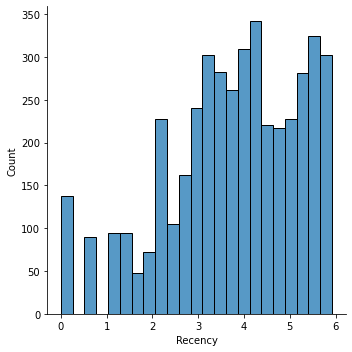

In [159]:
#Data distribution after data normalization for Recency
Recency_plot = Log_Tfd_Data['Recency']
sns.displot(Recency_plot);

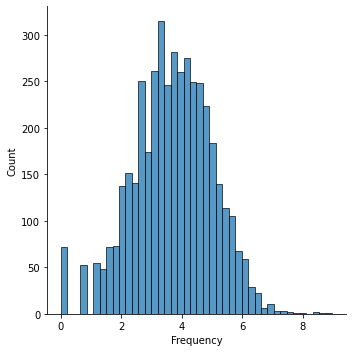

In [160]:
#Data distribution after data normalization for Frequency
Frequency_plot = Log_Tfd_Data['Frequency']
sns.displot(Frequency_plot);

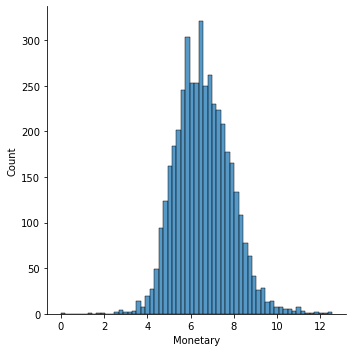

In [161]:
#Data distribution after data normalization for Frequency
Monetary_plot = Log_Tfd_Data['Monetary']
sns.displot(Monetary_plot);

##### Standardising the R, F, M data

In [162]:
# Bring the data on the same scale
scaled_obj = StandardScaler()
Scaled_data = scaled_obj.fit_transform(Log_Tfd_Data)

# Transform it back to the DataFrame
Scaled_data = pd.DataFrame(Scaled_data, index=RFMScore.index, columns=Log_Tfd_Data.columns)
Scaled_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.388508,-2.772924,3.688795
12347.0,-2.064527,1.149331,1.407382
12348.0,0.393497,-0.184718,0.715446
12349.0,-0.574384,0.460449,0.698049
12350.0,1.356629,-0.637692,-0.614653
...,...,...,...
18280.0,1.279986,-1.037153,-1.101776
18281.0,0.987655,-1.306224,-1.737567
18282.0,-1.214664,-0.899980,-1.112847


### 6.2 KMeans clustering

#### Getting optimum K value of clusters using Elbow-method

Text(0.5, 1.0, 'Elbow method for Optimal K value')

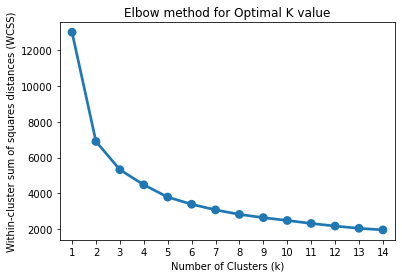

In [165]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters=k, max_iter=1000)
    km = km.fit(Scaled_data)
    sum_of_sq_dist[k] = km.inertia_
# Plot the graph for sum_of_square_distance values and Numer of clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster sum of squares distances (WCSS)')
plt.title('Elbow method for Optimal K value')

We can see that telbow edga at k=3, hence we can say that, the optimal value of K is 2

#### Building the K-means 

In [166]:
KMeans_clust = KMeans(n_clusters=2, max_iter=1000)
KMeans_clust.fit(Scaled_data)

#Find the clusters for the observation geven in the dataset
RFMScore['Cluster'] = KMeans_clust.labels_
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9,Silver,1
12347.0,2,182,4310.00,1,4,4,144,9,Silver,0
12348.0,75,31,1797.24,3,2,4,324,9,Silver,1
12349.0,18,73,1757.55,2,3,4,234,9,Silver,0
12350.0,310,17,334.40,4,1,2,412,7,Gold,1


In [167]:
RFMScore[RFMScore['RFM_Loyalty_level']=='Platinum']['Cluster'].unique()

array([1, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1080x432 with 0 Axes>

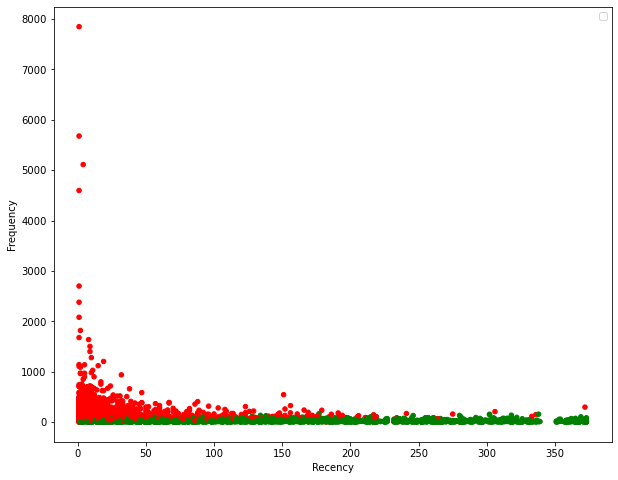

In [168]:
#Plotting the clusters
plt.figure(figsize=(15,6))

#Scatter plot Frequency vs Recency
colors=['red','green','blue']
RFMScore['Color'] = RFMScore['Cluster'].map(lambda p: colors[p])
RFMScore.plot(
kind='scatter',
    x='Recency',
    y='Frequency',
    figsize=(10,8),
    c=RFMScore['Color']
);
plt.legend();

In [169]:
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9,Silver,1,green
12347.0,2,182,4310.00,1,4,4,144,9,Silver,0,red
12348.0,75,31,1797.24,3,2,4,324,9,Silver,1,green
12349.0,18,73,1757.55,2,3,4,234,9,Silver,0,red
12350.0,310,17,334.40,4,1,2,412,7,Gold,1,green


## 7 Conclusion

In [170]:
# Getting summary data based on Loyalty of customers using RFM model
summary_of_RFMScore_based_on_Loyalty = RFMScore[['Recency', 'Frequency', 'Monetary', 'RFM_Loyalty_level']]
summary_of_RFMScore_based_on_Loyalty.groupby('RFM_Loyalty_level').agg([np.mean, np.min, np.max,np.size])

Recency                   Frequency                   \
                         mean amin amax  size        mean amin  amax  size   
RFM_Loyalty_level                                                            
Platinum           102.532609    1  373  1380   17.485507    1   121  1380   
Gold               105.034618    1  373  1531   52.491182    1   547  1531   
Silver              53.380571    1  373   875  230.800000    1  7847   875   
Bronze              91.124774   18  372   553  165.424955   20  1204   553   

                      Monetary                           
                          mean    amin       amax  size  
RFM_Loyalty_level                                        
Platinum            438.389762    1.00  168472.50  1380  
Gold                980.229146   63.44   58510.48  1531  
Silver             5624.434709  309.36  280206.02   875  
Bronze             3407.449984  343.28  124914.53   553

Firstly we did clustering on RFM analysis. We had 4 clusters/ segmentation of customers 

Platinum customer=1380 (less recency but high frequency and heavy spending)
Gold customer=1531 (good recency, frequency, spending)
Silver customer=875 (high recency, low frequency and low spending)
Bronze customer=553 (very high recency but very less frequency and spending)

Later we implemented the machine learning algorithms to cluster the customers

SL.No 	  Model Name 	                  Data 	           Optimal number of clusters 
1 	   KMeans with Elbow method 	Recency and Monetary 	    2 
2 	   KMeans with Elbow method 	Frequency and Monetary 	    2 
3 	   KMeans with Elbow method 	Recency and Monetary 	    2 

In [173]:
# Getting summary data based on Cluster of customers using KMeans model
summary_of_RFMScore_based_on_cluster = RFMScore[['Recency', 'Frequency', 'Monetary', 'Cluster']]
summary_of_RFMScore_based_on_cluster.groupby('Cluster').agg([np.mean, np.min, np.max,np.size])

Recency                   Frequency                      Monetary  \
               mean amin amax  size        mean amin  amax  size         mean   
Cluster                                                                         
0         30.811783    1  372  1918  175.951512    1  7847  1918  4050.750137   
1        140.564230    1  373  2421   24.968608    1   168  2421   471.734879   

                                  
           amin       amax  size  
Cluster                           
0        161.03  280206.02  1918  
1          1.00   77183.60  2421

1) Above clustering is done with recency, frequency, monetary data (KMeans clustering) as all 3 togeather will provide more information.
2) Cluster 0 has high recency rate but very low frequency and monetary. cluster 0 contains 2414
3) Clster 1 has low recency rate but they are frequent buyers and spends very high money than other customers as mean monetary value is very high. Thus generates more revenue to the retail business.
4) With this, we are done. Also we can us more robust analysis for the clustering, using not only RFM but other metrics such as demographics or product features.